### Student details

Student name: Feiyang Li

Student ID: 23202564

# Task 1: Perceptrons

* Weight/height Data obtained from https://github.com/johnmyleswhite/ML_for_Hackers

In [58]:
# import dependencies
import numpy as np
from sklearn.metrics import accuracy_score

### Perceptron class
From: https://sebastianraschka.com/Articles/2015_singlelayer_neurons.html

**Note:** The predict function returns either 1 or -1 as labels for the data. Therefore, the training data must match these labels.

In [59]:
class Perceptron(object):

    def __init__(self, eta=0.01, epochs=50):
        self.eta = eta
        self.epochs = epochs

    def train(self, X, y):

        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.epochs):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] +=  update * xi
                self.w_[0] +=  update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [60]:
class PerceptronEE(object):
    def __init__(self, eta=0.01, epochs=50, tol=1e-5):
        self.eta = eta
        self.epochs = epochs
        self.tol = tol

    def train(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.epochs):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] +=  update * xi
                self.w_[0] +=  update
                errors += int(update != 0.0)
            self.errors_.append(errors)

            if errors <= self.tol:
                break
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)


perceptron_ee = PerceptronEE(eta=0.1, epochs=50, tol=1e-5)
perceptron_ee.train(X_train, y_train)

### Read the data
(provided - should be completed in previous E-tivity)

In [61]:
import pandas

# Read the data from the .csv, using the first row as the headers of the data
data = pandas.read_csv('01_heights_weights_sex.csv',header=0)

X = data.iloc[:,1:3].values # X is the features in our dataset
y = data.iloc[:,0].values
# y is the Labels in our dataset, converted to integers
# Note the conversion to 1 and -1, to match the perceptron class
y = np.where(y == "Female", 1, -1)

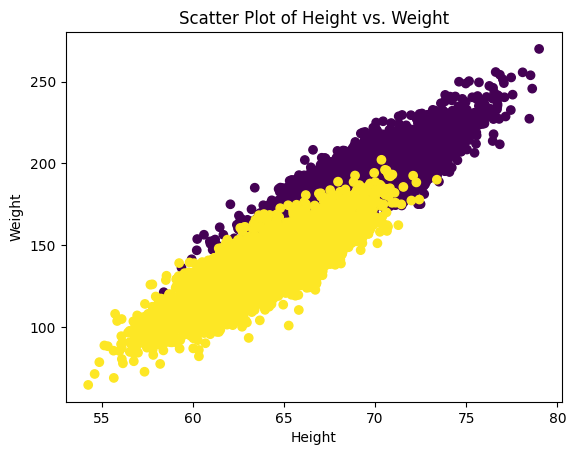

In [62]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1],c=y);
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Scatter Plot of Height vs. Weight')
plt.show()

### Train/Test Split
(provided - should be completed in previous E-tivity)

In [63]:
# divide the dataset in train test using scikit learn
# now the model will train in training dataset and then we will use test dataset to predict its accuracy

from sklearn.model_selection import train_test_split

# set random_state to a fixed number, so while the outcome is random, it is repeatible (same result each time)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Train the algorithm (Task)

In [64]:
################################
# Your code here

perceptron = Perceptron(eta=0.1, epochs=50)
perceptron.train(X_train, y_train)



### Calculate the accuarcy score using the test data and sklearn.metrics (Task)

In [65]:
################################
# Your code here

y_pred = perceptron.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')


Accuracy: 0.8545454545454545


### Visualisations (Task)
1. Visualise the errors at each training epoch. Hint, the errors for each epoch are stored in the errors class variable
2. Using many random inputs (e.g. 5000) plot to see if you can see the decision boundary. In this case, you will not be using the pandas dataframe, so it is probably better to use matplotlib

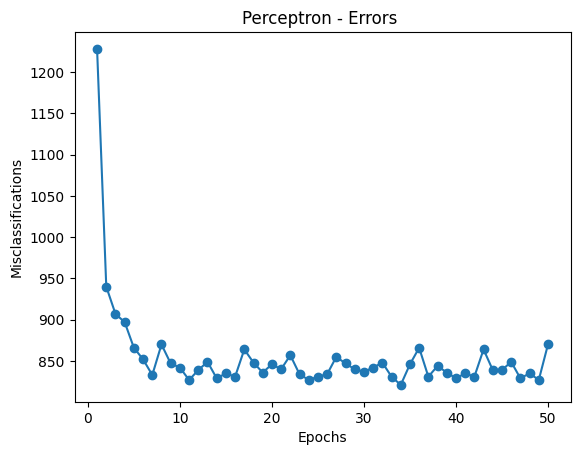

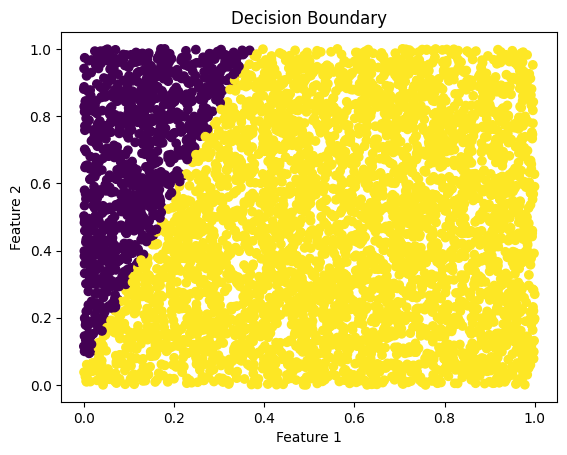

In [66]:
################################
# Your code here

# perceptron = Perceptron(eta=0.1, epochs=50)
# perceptron.train(X_train, y_train)

# Visualize errors at each training epoch
plt.plot(range(1, perceptron.epochs + 1), perceptron.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Misclassifications')
plt.title('Perceptron - Errors ')
plt.show()

# Generate random inputs for visualization
np.random.seed(0)
random_inputs = np.random.rand(5000, 2)

# Predict the labels for random inputs
random_predictions = perceptron.predict(random_inputs)

# Plotting the decision boundary
plt.scatter(random_inputs[:, 0], random_inputs[:, 1], c=random_predictions)
plt.title('Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


### Then, discuss the following in Markdown cells:
1.	Describe what is happening as the training progresses?
2.	Do we arrive at the very best solution at the last epoch, or is there an epoch with a lower error? Why is that?
3.	Why can’t we get zero error with this data?


1. As training proceeds, the perceptron is repeatedly exposed to the training data for a certain number of training cycles. In each cycle, it traverses all the training samples and updates the weights based on the prediction error. The learning process tries to find a set of weights to minimise the classification error.  
2. We won't necessarily get the best solution in the last training cycle. There may be a cycle with a much lower error. This is because the perceptron updates based on each training sample, and the data may not be linearly divisible. If the data is not linearly divisible, the perceptual machine will not be able to find a hyperplane that completely separates the different classes.  
3. The reason that zero error could not be achieved in this dataset may be because the dataset itself may not be completely linearly separable. That is, there is no straight line that can completely separate all the "Female" and "Male" samples. Therefore, the perceptron cannot adjust the weights to achieve zero error.